# Libs

In [647]:
# https://www.kaggle.com/datasets/abdelrahmanahmed110/used-cars-for-sale-in-egypt/data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Dataset Details

In [648]:
data = pd.read_csv('hatla2ee_scraped_data.csv')
df = data.copy()
df.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Kia Sportage 2024,"2,800,000 EGP",Dark grey,300 Km,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...
1,Chery Arrizo 5 2022,NaN,Bronze,"86,000 Km",Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chery/Arrizo-5/...
2,Fiat Tipo 2021,"1,200,000 EGP",Petroleum,"131,000 Km",Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701
3,Hyundai Tucson Turbo GDI 2021,"2,050,000 EGP",Black,"125,000 Km",Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...
4,BMW X1 2018,"2,050,000 EGP",Gray,"84,000 Km",BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123


In [649]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33559 entries, 0 to 33558
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    33559 non-null  object
 1   Price                   32625 non-null  object
 2   Color                   33559 non-null  object
 3   Mileage                 31440 non-null  object
 4   Make                    33559 non-null  object
 5   Model                   33559 non-null  object
 6   City                    33559 non-null  object
 7   Date Displayed          33559 non-null  object
 8   Automatic Transmission  33559 non-null  object
 9   Air Conditioner         33559 non-null  object
 10  Power Steering          33559 non-null  object
 11  Remote Control          33559 non-null  object
 12  Item URL                33559 non-null  object
dtypes: object(13)
memory usage: 3.3+ MB


In [650]:
df.isnull().sum()

,0
Name,0
Price,934
Color,0
Mileage,2119
Make,0
Model,0
City,0
Date Displayed,0
Automatic Transmission,0
Air Conditioner,0


In [651]:
df.describe()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
count,33559,32625,33559,31440,33559,33559,33559,33559,33559,33559,33559,33559,33559
unique,4158,828,24,1084,101,889,103,124,2,2,2,2,22048
top,Nissan Sunny 2022,"650,000 EGP",Black,"200,000 Km",Hyundai,Sunny,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chevrolet/lanos...
freq,647,969,6532,1317,3800,1868,3983,12333,21289,20643,18450,19263,289


# Missings and Duplicates

In [652]:
df.drop_duplicates(inplace=True)

In [653]:
# to remove EGP and KM from Price and Mileage
def clean_num(x):
    if type(x) == str:
        return float(x.split()[0].replace(',' , ''))
    else:
        return np.nan
df["Price"] = df["Price"].apply(clean_num)
df["Mileage"] = df["Mileage"].apply(clean_num)

df.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Kia Sportage 2024,2800000.0,Dark grey,300.0,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...
1,Chery Arrizo 5 2022,NaN,Bronze,86000.0,Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chery/Arrizo-5/...
2,Fiat Tipo 2021,1200000.0,Petroleum,131000.0,Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701
3,Hyundai Tucson Turbo GDI 2021,2050000.0,Black,125000.0,Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...
4,BMW X1 2018,2050000.0,Gray,84000.0,BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123


In [654]:
print(len(df))

df = df.dropna(subset=['Price']).copy() # Remove missing targets and ensure it's a new copy
df["Mileage"] = df["Mileage"].fillna(df["Mileage"].median()) # Fill missing values with median

print(len(df))

22052
21981


In [655]:
df.isnull().sum() # GG =))

,0
Name,0
Price,0
Color,0
Mileage,0
Make,0
Model,0
City,0
Date Displayed,0
Automatic Transmission,0
Air Conditioner,0


#Feature Selection/Creation

#### Handle Date_Displayed Column and Date in Name Column

In [656]:
df['Model_Year'] = (df["Name"].apply(lambda x: x.split()[-1])).astype("int") # get model year from Name column.

In [657]:
df.isnull().sum()

,0
Name,0
Price,0
Color,0
Mileage,0
Make,0
Model,0
City,0
Date Displayed,0
Automatic Transmission,0
Air Conditioner,0


In [658]:
df['Model_Year'].unique()

array([2024, 2021, 2018, 2022, 2014, 2011, 2001, 2002, 2008, 2023, 2010,
       2003, 2004, 2000, 2016, 2020, 2006, 2009, 2019, 2017, 2012, 1999,
       2005, 2013, 1995, 2015, 2007, 1985, 1988, 1996, 1998, 1984, 1979,
       1997, 1983, 1994, 1992, 1993, 1974, 1991, 1978, 1990, 1987, 1986,
       1977, 1970, 1980, 1982, 1989, 1981, 1976, 1973,    0, 1975, 1971,
       1963, 1964])

In [659]:
df.drop(df[df["Model_Year"] == '0'].index,inplace=True)

### Create New Features Based Date


In [660]:
# Create Car_Age Feature
df['Date Displayed'] = pd.to_datetime(df['Date Displayed'])
df['Car_Age'] = df['Date Displayed'].dt.year - df['Model_Year']

In [661]:
df['Car_Age'].unique()

array([   0,    3,    6,    2,   10,   13,   23,   22,   16,    1,   14,
         21,   20,   24,    8,    4,   18,   15,    5,    7,   12,   25,
         19,   11,   29,    9,   17,   39,   36,   28,   26,   40,   45,
         27,   41,   30,   32,   31,   50,   33,   46,   34,   37,   38,
         47,   54,   44,   42,   35,   43,   48,   51, 2024,   -1,   52,
         49,   53,   60,   59])

In [662]:
df.loc[df['Car_Age'] < 0, 'Car_Age'] = 0
df.loc[df['Car_Age'] == 2024, 'Car_Age'] = df['Car_Age'].median()

In [663]:
df['Car_Age'].unique()

array([ 0,  3,  6,  2, 10, 13, 23, 22, 16,  1, 14, 21, 20, 24,  8,  4, 18,
       15,  5,  7, 12, 25, 19, 11, 29,  9, 17, 39, 36, 28, 26, 40, 45, 27,
       41, 30, 32, 31, 50, 33, 46, 34, 37, 38, 47, 54, 44, 42, 35, 43, 48,
       51, 52, 49, 53, 60, 59])

# Outliers

In [664]:
df.describe()
# min price is 1060??

,Price,Mileage,Date Displayed,Model_Year,Car_Age
count,2.198100e+04,2.198100e+04,21981,21981.000000,21981.000000
mean,8.477219e+05,1.345936e+05,2023-12-25 01:50:07.451890176,2013.253901,10.133479
min,1.060000e+03,0.000000e+00,2023-10-16 00:00:00,0.000000,0.000000
25%,3.600000e+05,7.300100e+04,2023-11-23 00:00:00,2009.000000,3.000000
50%,6.150000e+05,1.270000e+05,2023-12-28 00:00:00,2015.000000,8.000000
75%,9.500000e+05,1.850000e+05,2024-01-30 00:00:00,2020.000000,14.000000
max,2.000000e+07,2.226000e+06,2024-02-16 00:00:00,2024.000000,60.000000
std,9.321061e+05,8.537281e+04,NaN,16.182948,8.801270


In [665]:
sorted_values = df.sort_values(by='Price', ascending=True)
sorted_values.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL,Model_Year,Car_Age
277,Nissan Sunny 2024,1060.0,Black,127000.0,Nissan,Sunny,Alexandria,2024-02-15,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/nissan/sunny/62...,2024,0
19025,Hyundai Getz 2010,5000.0,Dark grey,127000.0,Hyundai,Getz,Gharbia,2023-12-25,Yes,Yes,No,Yes,https://eg.hatla2ee.com/en/car/hyundai/getz/61...,2010,13
19517,Seat 133 1989,20000.0,Beige,127000.0,Seat,133,Shobra,2023-12-15,No,No,No,No,https://eg.hatla2ee.com/en/car/seat/133/6163247,1989,34
8192,Fiat 128 1977,21000.0,Red,500000.0,Fiat,128,Cairo,2024-01-02,No,No,No,No,https://eg.hatla2ee.com/en/car/fiat/128/6204260,1977,47
21996,Fiat 127 1984,24000.0,Red,127000.0,Fiat,127,Cairo,2023-10-17,No,No,No,No,https://eg.hatla2ee.com/en/car/fiat/127/6043217,1984,39


In [666]:
print(len(df))
df = df[df['Price'] > 5000] # keep what's greater than 5000 EGP
print(len(df))

21981
21979


# Skewed Data

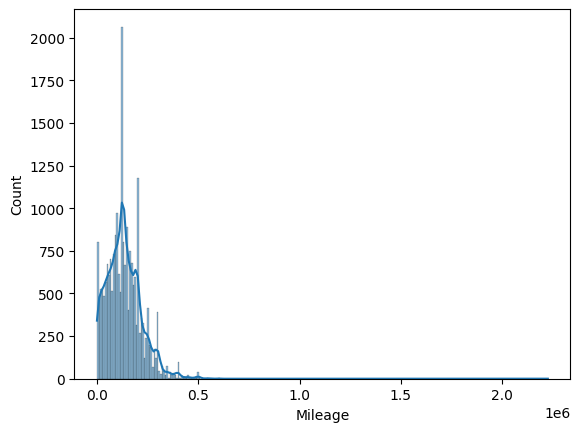

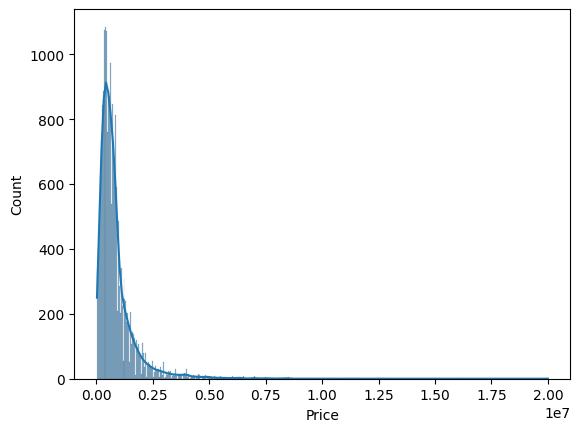

In [667]:
for col in ["Mileage","Price"]:
    sns.histplot(data=df, x = col, kde=True)
    plt.show()

In [668]:
# log transformation
df['Price'] = np.log1p(df['Price'])
df['Mileage'] = np.log1p(df['Mileage'])

# Encoding


In [669]:
encoders = {}
label_encoder_columns = ['Make', 'Model']

for col in label_encoder_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Split


### Binary Mapping On Binary Columns First


In [670]:
binary_cols = ['Automatic Transmission', 'Air Conditioner', 'Power Steering', 'Remote Control']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

### Splitting

In [671]:
selected_features = ['Mileage', 'Make', 'Model', 'Automatic Transmission', 'Air Conditioner', 'Power Steering', 'Remote Control', 'Car_Age']
X = df[selected_features]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling

In [672]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regression

In [673]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred)

In [674]:
R2 = r2_score(y_test, y_pred)
MAE = mean_absolute_error(y_test_real, y_pred_real)
RMSE = np.sqrt(mean_squared_error(y_test_real, y_pred_real))

MAE_log = mean_absolute_error(y_test, y_pred)
RMSE_log = np.sqrt(mean_squared_error(y_test, y_pred))

In [675]:
print(f"R-squared score: {R2:.4f}")
print(f"Mean Absolute Error (MAE): {MAE:,.2f} EGP")
print(f"Root Mean Squared Error (RMSE): {RMSE:,.2f} EGP")
print(f"MAE for log values: {MAE_log:,.2f}")
print(f"RMSE for log values: {RMSE_log:,.2f}")

R-squared score: 0.8643
Mean Absolute Error (MAE): 189,486.56 EGP
Root Mean Squared Error (RMSE): 556,806.48 EGP
MAE for log values: 0.21
RMSE for log values: 0.32


# Decision Tree Regressor

In [676]:
decision_tree_model = DecisionTreeRegressor(random_state=42, max_depth=20)
decision_tree_model.fit(X_train_scaled, y_train)

y_pred_dt = decision_tree_model.predict(X_test_scaled)
y_test_real_dt = np.expm1(y_test)
y_pred_real_dt = np.expm1(y_pred_dt)

In [677]:
R2_dt = r2_score(y_test, y_pred_dt)
MAE_dt = mean_absolute_error(y_test_real_dt, y_pred_real_dt)
RMSE_dt = np.sqrt(mean_squared_error(y_test_real_dt, y_pred_real_dt))
MAE_log_dt = mean_absolute_error(y_test, y_pred_dt)
RMSE_log_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

In [678]:
print("\n--- Decision Tree Regressor Results ---")
print(f"R-squared score: {R2_dt:.4f}")
print(f"Mean Absolute Error (MAE): {MAE_dt:,.2f} EGP")
print(f"Root Mean Squared Error (RMSE): {RMSE_dt:,.2f} EGP")
print(f"MAE for log values: {MAE_log_dt:,.2f}")
print(f"RMSE for log values: {RMSE_log_dt:,.2f}")


--- Decision Tree Regressor Results ---
R-squared score: 0.7928
Mean Absolute Error (MAE): 228,976.86 EGP
Root Mean Squared Error (RMSE): 638,564.62 EGP
MAE for log values: 0.26
RMSE for log values: 0.40


# Visualization

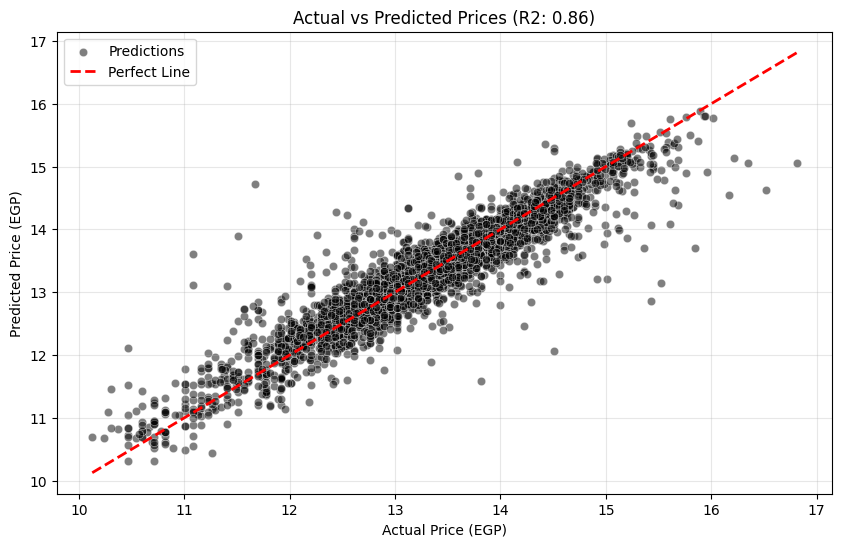

In [679]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='black', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Line')

plt.xlabel('Actual Price (EGP)')
plt.ylabel('Predicted Price (EGP)')
plt.title(f'Actual vs Predicted Prices (R2: {R2:.2f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('random_forest_label_standard_predictions.png')
plt.show()

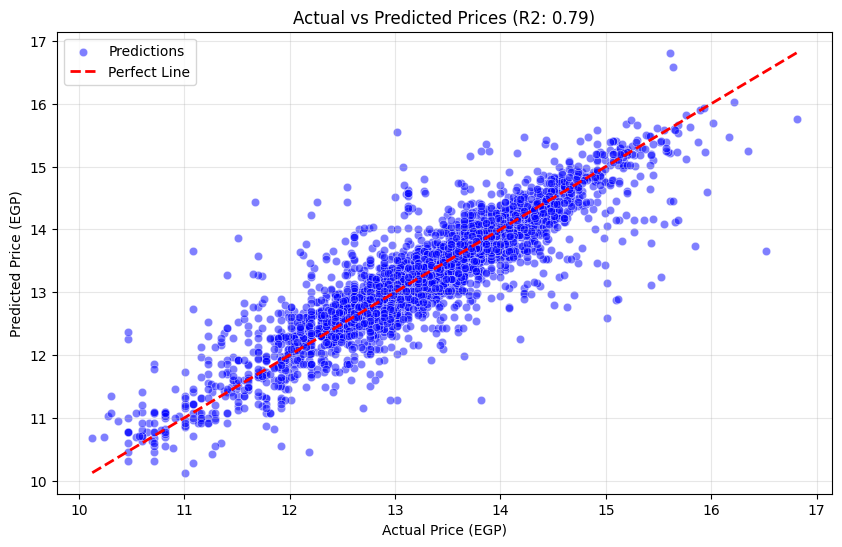

In [680]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt, alpha=0.5, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Line')

plt.xlabel('Actual Price (EGP)')
plt.ylabel('Predicted Price (EGP)')
plt.title(f'Actual vs Predicted Prices (R2: {R2_dt:.2f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('random_forest_label_standard_predictions.png')
plt.show()

# Input

In [681]:
def predict_from_input():
    print("\n--- Enter Car Details ---")

    try:
        make = input("Enter Make (e.g. Kia): ").strip()
        model_name = input("Enter Model (e.g. Sportage): ").strip()

        # Check if the model knows this Make/Model
        if make not in encoders['Make'].classes_:
            print(f"\n Error: The model doesn't know the Make '{make}'.")
            print(f"Try one of these: {encoders['Make'].classes_[:5]}")
            return

        if model_name not in encoders['Model'].classes_:
            print(f"\nError: The model doesn't know the Model '{model_name}'.")
            return
        # ----------------------------------

        mileage_raw = float(input("Enter Mileage (in KM): "))
        made_year = int(input("Enter Made Year (e.g. 2020): "))
        listing_year = int(input("Enter Listing Year (e.g. 2024): "))

        print("For the following, answer 'y' for Yes or 'n' for No:")
        auto = 1 if input("Automatic Transmission? ").lower() == 'y' else 0
        ac = 1 if input("Air Conditioner? ").lower() == 'y' else 0
        power_steer = 1 if input("Power Steering? ").lower() == 'y' else 0
        remote = 1 if input("Remote Control? ").lower() == 'y' else 0

        # 2. Process Data
        mileage_log = np.log1p(mileage_raw)
        car_age = max(0, listing_year - made_year)

        # Encode
        make_encoded = encoders['Make'].transform([make])[0]
        model_encoded = encoders['Model'].transform([model_name])[0]

        # 3. Create DataFrame
        input_data = pd.DataFrame([{
            'Mileage': mileage_log,
            'Make': make_encoded,
            'Model': model_encoded,
            'Automatic Transmission': auto,
            'Air Conditioner': ac,
            'Power Steering': power_steer,
            'Remote Control': remote,
            'Car_Age': car_age
        }])

        # Ensure correct column order
        input_data = input_data[X.columns]

        # 4. Scale and Predict
        input_scaled = scaler.transform(input_data)

        # Predict with Random Forest Model
        log_price_rf = model.predict(input_scaled)[0]
        real_price_rf = np.expm1(log_price_rf)

        # Predict with Decision Tree Model
        log_price_dt = decision_tree_model.predict(input_scaled)[0]
        real_price_dt = np.expm1(log_price_dt)

        print("\n" + "="*40)
        print(f"Predicted Price (Random Forest): {real_price_rf:,.0f} EGP")
        print(f"Predicted Price (Decision Tree): {real_price_dt:,.0f} EGP")
        print("="*40)

    except Exception as e:
        print(f"\n Error: {e}")

predict_from_input()


--- Enter Car Details ---
Enter Make (e.g. Kia): Kia
Enter Model (e.g. Sportage): Sportage
Enter Mileage (in KM): 0
Enter Made Year (e.g. 2020): 2020
Enter Listing Year (e.g. 2024): 2024
For the following, answer 'y' for Yes or 'n' for No:
Automatic Transmission? y
Air Conditioner? y
Power Steering? y
Remote Control? y

Predicted Price (Random Forest): 2,608,730 EGP
Predicted Price (Decision Tree): 2,732,847 EGP
